# Research on Predicting residential electricity consumption patterns based on smart meter and household data in UK

Load and Preprocess the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv('LCL-June2015v2_99.csv')

In [ ]:
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC004221,Std,2013-08-06 07:00:00.0000000,0.046
1,MAC004221,Std,2013-08-06 07:30:00.0000000,0.04
2,MAC004221,Std,2013-08-06 08:00:00.0000000,0.016
3,MAC004221,Std,2013-08-06 08:30:00.0000000,0.018
4,MAC004221,Std,2013-08-06 09:00:00.0000000,0.016


In [ ]:
df.columns

Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41193 entries, 0 to 41192
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LCLid                    41193 non-null  object
 1   stdorToU                 41193 non-null  object
 2   DateTime                 41193 non-null  object
 3   KWH/hh (per half hour)   41192 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
count,41193,41193,41193,41192
unique,3,1,30892,1457
top,MAC004222,Std,2013-08-26 00:00:00.0000000,0.024
freq,30907,41193,4,420


In [ ]:
# Check for missing values
df.isnull().sum()

,0
LCLid,0
stdorToU,0
DateTime,0
KWH/hh (per half hour),1


Exploratory Data Analysis (EDA)

In [ ]:
df_cleaned = df.copy()

In [ ]:
# Convert DateTime to datetime format and extract hour and day features
df_cleaned['DateTime'] = pd.to_datetime(df_cleaned['DateTime'], format='%Y-%m-%d', errors='coerce') # Added format and errors arguments
df_cleaned['hour'] = df_cleaned['DateTime'].dt.hour
df_cleaned['day'] = df_cleaned['DateTime'].dt.day

In [ ]:
# Drop the original DateTime and LCLid columns as they are not useful for modeling
df_cleaned = df_cleaned.drop(columns=['DateTime', 'LCLid'])

In [ ]:
# Summary statistics of the dataset
df_cleaned.describe()

,hour,day
count,1.0,1.0
mean,0.0,3.0
std,NaN,NaN
min,0.0,3.0
25%,0.0,3.0
50%,0.0,3.0
75%,0.0,3.0
max,0.0,3.0


In [ ]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

In [ ]:
# Assuming the column name is correct after checking
df_cleaned = df_cleaned.dropna(subset=['KWH/hh (per half hour)'])

#Proceed with data analysis and modeling
X = df_cleaned[['stdorToU']]
y = df_cleaned['KWH/hh (per half hour)']

Data Visualizations

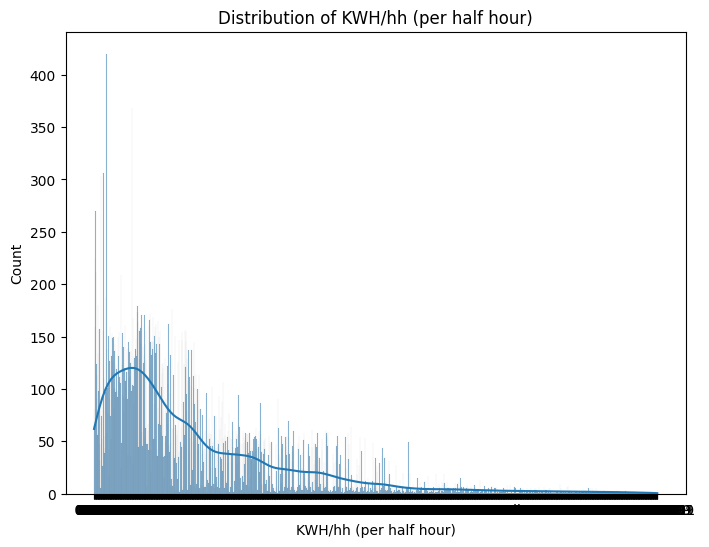

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['KWH/hh (per half hour)'], kde=True)
plt.title('Distribution of KWH/hh (per half hour)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


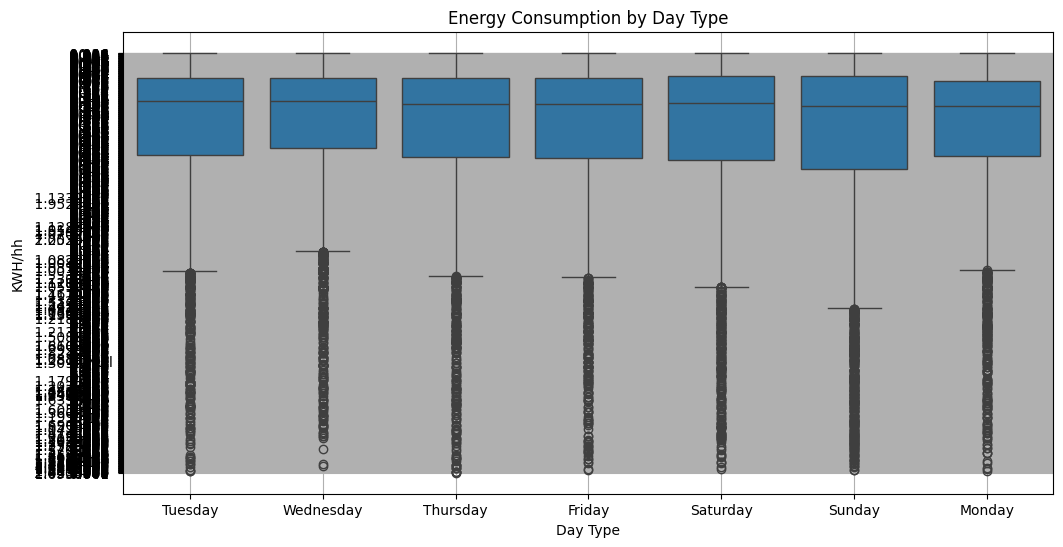

In [ ]:
# Create a new column for the day type
df_cleaned['DayType'] = df_cleaned.index.day_name()

plt.figure(figsize=(12, 6))
sns.boxplot(x='DayType', y='KWH/hh (per half hour)', data=df_cleaned)
plt.title('Energy Consumption by Day Type')
plt.xlabel('Day Type')
plt.ylabel('KWH/hh')
plt.grid()
plt.show()

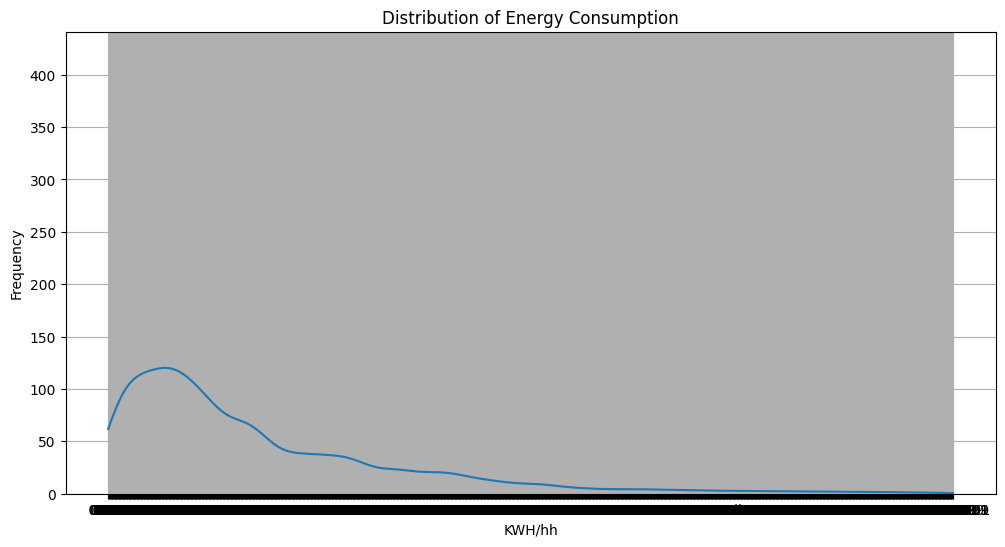

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['KWH/hh (per half hour)'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('KWH/hh')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Data Modeling

In [ ]:
# Separating features and target variable
X = df_cleaned[['stdorToU']]  # Features
y = df_cleaned['KWH/hh (per half hour)']  # Target

In [ ]:
# Separating features and target variable
X = df_cleaned[['stdorToU']]  # Features
y = df_cleaned['KWH/hh (per half hour)']  # Target

# Ensure 'stdorToU' is of type 'object' (categorical)
df_cleaned['stdorToU'] = df_cleaned['stdorToU'].astype(str)

# Convert categorical features to dummy variables (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert categorical features to dummy variables (One-Hot Encoding)
if df_cleaned['stdorToU'].nunique() > 1:
    X = pd.get_dummies(X, drop_first=True)
else:
    print("The column 'stdorToU' has only one unique value. One-hot encoding is skipped.")

The column 'stdorToU' has only one unique value. One-hot encoding is skipped.


In [ ]:
# Check the initial state of the data
print("Initial DataFrame shape:", X_train.shape)
print(X_train.head())

# Check if 'stdorToU' has more than one unique value after dropping nulls
if X_train['stdorToU'].nunique() > 1:
    # One-hot encode categorical variables if there are at least two unique values
    X_train_encoded = pd.get_dummies(X_train, drop_first=True)

    # Check the shape after encoding
    print("Encoded DataFrame shape:", X_train_encoded.shape)
    print(X_train_encoded.head())

    # Now scale the features
    scaler = StandardScaler()

    # Fit and transform the scaler
    X_train_scaled = scaler.fit_transform(X_train_encoded)

    # Check the shape of the scaled data
    print("Scaled DataFrame shape:", X_train_scaled.shape)
else:
    print("The column 'stdorToU' has only one unique value in the training set. One-hot encoding and scaling are skipped.")
    X_train_scaled = X_train


Initial DataFrame shape: (32953, 1)
                    stdorToU
DateTime                    
2012-07-15 19:00:00      Std
2013-03-29 20:30:00      Std
2014-01-31 17:00:00      Std
2012-12-29 15:00:00      Std
2013-10-14 08:30:00      Std
The column 'stdorToU' has only one unique value in the training set. One-hot encoding and scaling are skipped.


Modeling and Evaluation

Random Forest Regressor

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Print results
print('--- Random Forest Classifier ---')
print(f'Accuracy: {rf_accuracy:.4f}')
print('Classification Report:')
print(rf_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Random Forest Classifier ---
Accuracy: 0.0102
Classification Report:
              precision    recall  f1-score   support

      0.016        0.00      0.00      0.00        24
      0.017        0.00      0.00      0.00        49
      0.018        0.00      0.00      0.00        49
      0.019        0.00      0.00      0.00        23
       0.02        0.00      0.00      0.00        30
      0.021        0.00      0.00      0.00         9
      0.022        0.00      0.00      0.00        37
      0.023        0.00      0.00      0.00        68
      0.024        0.01      1.00      0.02        84
      0.025        0.00      0.00      0.00        43
      0.026        0.00      0.00      0.00        27
      0.027        0.00      0.00      0.00        19
      0.028        0.00      0.00      0.00         5
      0.029        0.00      0.00      0.00         5
       0.03        0.00      0.00      0.00         5
      0.031        0.00      0.00      0.00         4
      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_dt = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Print results
print('--- Decision Tree Classifier ---')
print(f'Accuracy: {dt_accuracy:.4f}')
print('Classification Report:')
print(dt_report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Decision Tree Classifier ---
Accuracy: 0.0102
Classification Report:
              precision    recall  f1-score   support

      0.016        0.00      0.00      0.00        24
      0.017        0.00      0.00      0.00        49
      0.018        0.00      0.00      0.00        49
      0.019        0.00      0.00      0.00        23
       0.02        0.00      0.00      0.00        30
      0.021        0.00      0.00      0.00         9
      0.022        0.00      0.00      0.00        37
      0.023        0.00      0.00      0.00        68
      0.024        0.01      1.00      0.02        84
      0.025        0.00      0.00      0.00        43
      0.026        0.00      0.00      0.00        27
      0.027        0.00      0.00      0.00        19
      0.028        0.00      0.00      0.00         5
      0.029        0.00      0.00      0.00         5
       0.03        0.00      0.00      0.00         5
      0.031        0.00      0.00      0.00         4
      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


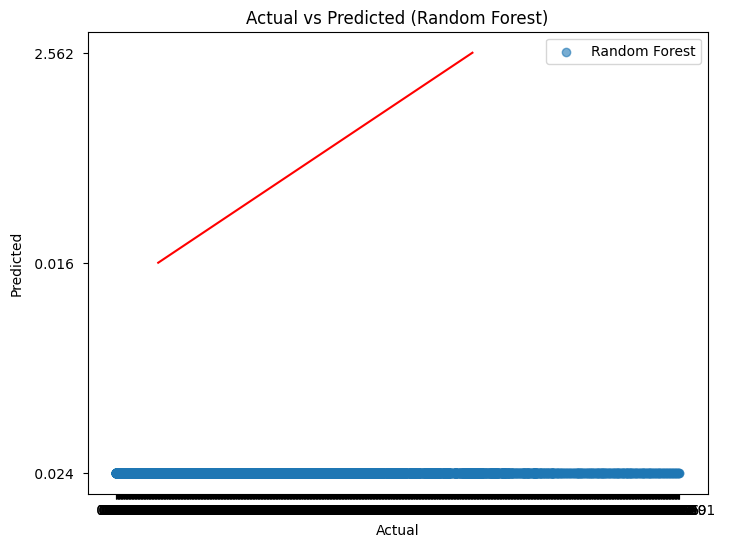

In [ ]:
# Actual vs Predicted for Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

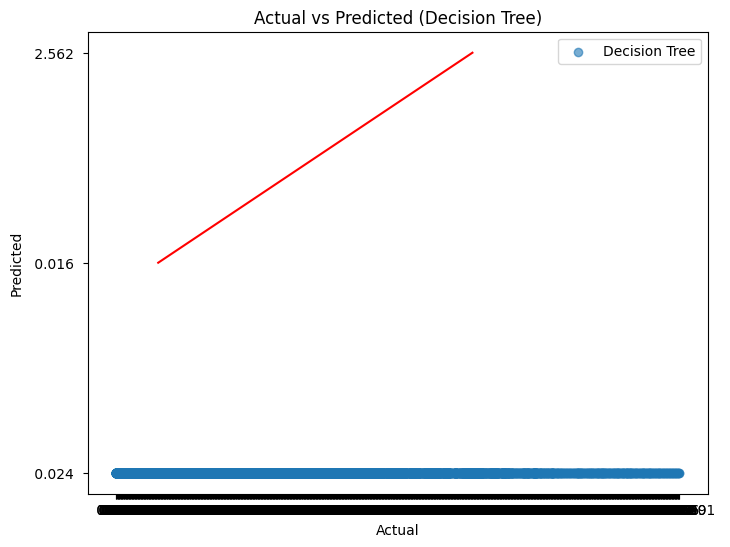

In [ ]:
# Actual vs Predicted for Decision Tree
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, label='Decision Tree', alpha=0.6) # Changed dt_predictions to y_pred_dt
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted (Decision Tree)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()